# Class activation map is an unsupervised way of doing object localization with accuracy near par with supervised methods

# following model trained on 300 images. fine tuned final few layers of VGG19

In [10]:
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from multi_CAM_large_image import overlay_multi_layered_cam_large_image, overlay_single_layered_cam_large_image

In [3]:
# load model
model = load_model('VGG19_trained.h5')

# Generating CAM on a large image

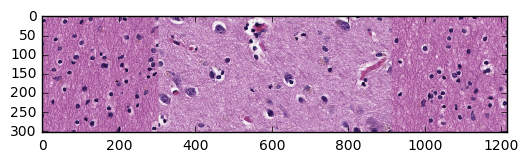

In [21]:
grey1 = plt.imread('data/all/train/gray/Gray (1006).jpg')
grey2 = plt.imread('data/all/train/gray/Gray (1007).jpg')
white1 = plt.imread('data/all/train/white/WhiteM1 (113).jpg')
white2 = plt.imread('data/all/train/white/WhiteM1 (114).jpg')

t1 = np.concatenate((white1, grey1),axis=1)
t2 = np.concatenate((grey2, white2),axis=1)
new_img = np.concatenate((t1, t2),axis=1)

plt.imshow(new_img)

In [22]:
plt.imsave("images/small_tiled_tissue.jpg", new_img)

## Generating Single Layer CAM's 

In [23]:
### configurations

overlay_pred = True  # get heatmap with predictions written over each tile
trained_img_size = 304  # size of each tile (size our cnn was trained on)
conv_block = 'block5_conv4'  # name of the final convolutional layer (for vgg) (can view layers using model.summary())
text_color = (0, 255, 80)  # overlay text color
classes = ['Blank', 'Gray Mat.', 'White Mat.']  # classes model was trained on. ordering matters
a = 0.3  # heatmap transparency

### 1. show which parts constitute gray matter

In [30]:
heatmap_class = 'Gray Mat.' # get heatmap of specified class

cam = overlay_single_layered_cam_large_image(model, trained_img_size, classes, new_img, conv_block, heatmap_class,
                                                    overlay_alpha=a,
                                                    overlay_predictions=overlay_pred,
                                                    overlay_text_color=text_color)

Blank --> Red
Gray Mat. --> Blue
White Mat. --> Green
Analyzing
....
Complete


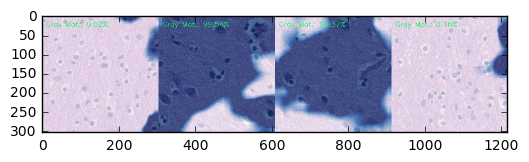

In [31]:
plt.imshow(cam)

In [34]:
plt.imsave("images/single_class_heatmap_GRAYMATTER", cam)

### 2. show which parts constitute white matter

In [35]:
heatmap_class = 'White Mat.' # get heatmap of specified class

cam = overlay_single_layered_cam_large_image(model, trained_img_size, classes, new_img, conv_block, heatmap_class,
                                                    overlay_alpha=a,
                                                    overlay_predictions=overlay_pred,
                                                    overlay_text_color=text_color)

Blank --> Red
Gray Mat. --> Blue
White Mat. --> Green
Analyzing
....
Complete


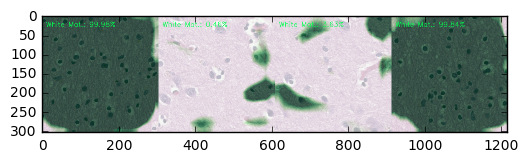

In [36]:
plt.imshow(cam)

In [37]:
plt.imsave("images/single_class_heatmap_WHITEMATTER", cam)

### 3. show which parts constitute blank

In [38]:
heatmap_class = 'Blank' # get heatmap of specified class

cam = overlay_single_layered_cam_large_image(model, trained_img_size, classes, new_img, conv_block, heatmap_class,
                                                    overlay_alpha=a,
                                                    overlay_predictions=overlay_pred,
                                                    overlay_text_color=text_color)

Blank --> Red
Gray Mat. --> Blue
White Mat. --> Green
Analyzing
....
Complete


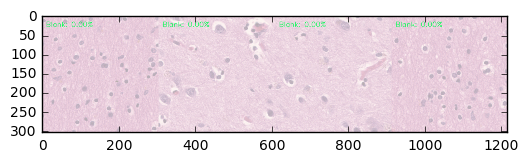

In [39]:
plt.imshow(cam)

In [40]:
plt.imsave("images/single_class_heatmap_BLANK", cam)

## Generating Multi Layer CAM's

In [41]:
import glob

g = glob.glob('data/all/train/gray/*.jpg')[:10]
w = glob.glob('data/all/train/white/*.jpg')[:10]
b = glob.glob('data/all/train/blank/*.jpg')[:10]


t1 = np.concatenate((plt.imread(b[0]), plt.imread(b[1]), plt.imread(b[2]), plt.imread(b[3]), plt.imread(w[0])),axis=1)
t2 = np.concatenate((plt.imread(w[1]), plt.imread(g[0]), plt.imread(w[2]), plt.imread(g[1]), plt.imread(g[2])),axis=1)
t3 = np.concatenate((plt.imread(w[3]), plt.imread(g[3]), plt.imread(w[4]), plt.imread(w[5]), plt.imread(g[5])),axis=1)
t4 = np.concatenate((plt.imread(g[8]), plt.imread(w[7]), plt.imread(g[7]), plt.imread(g[6]), plt.imread(w[6])),axis=1)
t5 = np.concatenate((plt.imread(g[9]), plt.imread(g[4]), plt.imread(w[8]), plt.imread(b[7]), plt.imread(b[8])),axis=1)
t6 = np.concatenate((plt.imread(w[9]), plt.imread(b[4]), plt.imread(b[5]), plt.imread(b[6]), plt.imread(b[9])),axis=1)
new_img = np.concatenate((t1, t2, t3, t4, t5, t6),axis=0)

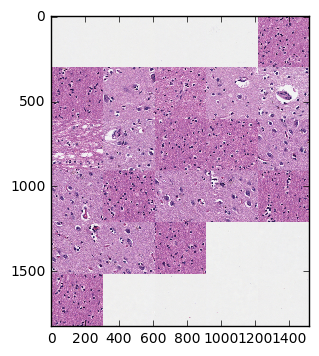

In [42]:
plt.imshow(new_img)

In [20]:
plt.imsave("images/multi_tiled_tissue.jpg", new_img)

### overlay prediction

In [19]:
overlay_pred = True  
show_top_x_classes = 3  # show everything

# get heatmap with top 3 images in each tile
cam = overlay_multi_layered_cam_large_image(model, trained_img_size, classes, new_img, conv_block, overlay_alpha=a,
                                                overlay_predictions=overlay_pred, show_top_x_classes=show_top_x_classes,
                                                overlay_text_color=text_color)

Blank --> Red
Gray Mat. --> Blue
White Mat. --> Green
Analyzing
..............................
Complete


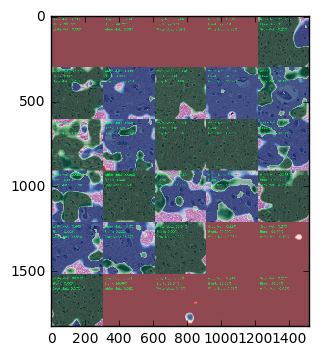

In [20]:
plt.imshow(cam)

In [21]:
plt.imsave("images/generated_heatmap.jpg", cam)